Для инвестирования 5 млн руб. и cтавки купона, равного 20% разработайте внебиржевой опцион “Autocallable” с ежеквартальным купоном и возможностью досрочного автоматического погашения опциона каждые 3 месяца, если на ежеквартальную купонную дату текущая цена бумаги с наибольшим снижением относительно своей первоначальной стоимости (worst-of performance) превышает или равна барьеру отзыва.

Если продукт не был отозван досрочно, и на последнюю купонную дату текущая цена worst of превышает или равна барьеру поставки, то продукт погашается с выплатой 100% номинала. Иначе, если хотя бы один базовый актив опциона оказался ниже барьера поставки, то осуществляется выплата денежных средств в сумме, равной эквиваленту «поставки бумаги», бумаги с наибольшим снижением относительно своей первоначальной стоимости, по ее первоначальной цене.

В корзину включить четыре базовых актива, первоначальную стоимость определить на день, предшествующий дате запуска (100%). Установить барьер отзыва 105%, купонный барьер 98%, барьер поставки 90% в процентах от первоначальной стоимости каждого базового актива корзину.

**Дата запуска:** 27-07-2022.

**Дата погашения:** 25-07-2023.

**Даты ежеквартальных наблюдений:** 25-10-2022, 25-01-2023, 25-04-2023.

1. Определить действия на купонные даты (выплачивается купон; выплачивается купон с досрочным погашением продукта; не выплачивается, но запоминается; выплачивается купон за текущий и предыдущие кварталы; производится погашение продукта с «эффектом поставки»).
1. Вычислить финансовый результат по состоянию на 25-04-2023,
определить бумагу с наибольшим снижением относительно своей первоначальной стоимости.
1. Привести иллюстративные графики, на которых отобразить бумагу с наибольшим снижением относительно своей первоначальной стоимости (worst-of performance), купонные даты и действия в эти даты, уровни барьеров отзыва, поставки и купонного барьера, первоначальную стоимость актива,
провести исследование влияния уровней барьеров (барьер отзыва, купонный барьер, барьер поставки) на финансовый результат.
1. Повторить расчеты для метода оценки базовых активов -- средневзвешенная динамика стоимости всех активов (average-of perfomance).

[Примеры графиков и расчетов.](https://www.open-broker.com/files/Presentation_OTC-Option_Autocallable_.pdf)


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Исходные параметры
start_date = "2022-07-27"
end_date = "2023-07-25"
observation_dates = pd.to_datetime(["2022-10-25", "2023-01-25", "2023-04-25", end_date])
assets = ["Asset A", "Asset B", "Asset C", "Asset D"]
initial_price = 100
investment = 5_000_000
coupon_rate = 0.2 / 4  # Ежеквартальный купон
call_barrier = 1.05
coupon_barrier = 0.98
delivery_barrier = 0.90

# Генерация случайных данных
dates = pd.date_range(start=start_date, end=end_date, freq="B")
prices = {asset: initial_price * (1 + np.random.uniform(-0.15, 0.15, len(dates))) for asset in assets}
price_data = pd.DataFrame(prices, index=dates)


In [13]:
# Расчет worst-of performance
price_data_normalized = price_data / initial_price
worst_of = price_data_normalized.min(axis=1)

# Определение выплат и действий
results = []
for obs_date in observation_dates:
    worst_value = worst_of.loc[obs_date]
    if worst_value >= call_barrier:
        results.append((obs_date, "Досрочное погашение", worst_value))
        break
    elif worst_value >= coupon_barrier:
        results.append((obs_date, "Выплата купона", worst_value))
    else:
        results.append((obs_date, "Купон не выплачен", worst_value))
final_worst_value = worst_of.loc[end_date]
results.append((end_date, "Эффект поставки" if final_worst_value < delivery_barrier else "Погашение номинала", final_worst_value))


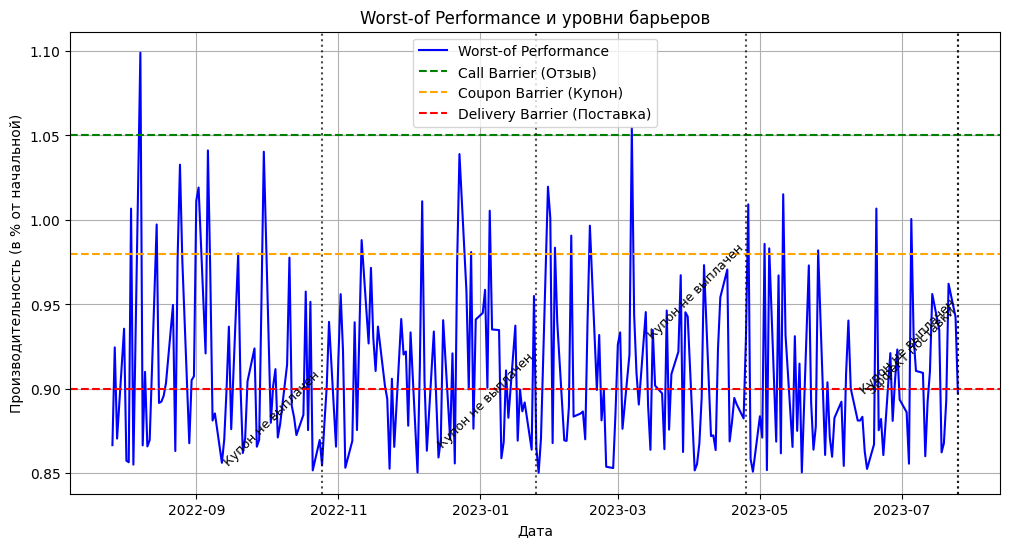

In [14]:
# Преобразование дат в datetime, если требуется
results = [(pd.Timestamp(date), action, value) for date, action, value in results]

# График worst-of performance
plt.figure(figsize=(12, 6))
plt.plot(price_data_normalized.index, worst_of, label="Worst-of Performance", color="blue")

# Добавляем барьеры
plt.axhline(call_barrier, color="green", linestyle="--", label="Call Barrier (Отзыв)")
plt.axhline(coupon_barrier, color="orange", linestyle="--", label="Coupon Barrier (Купон)")
plt.axhline(delivery_barrier, color="red", linestyle="--", label="Delivery Barrier (Поставка)")

# Отмечаем купонные даты и действия
for date, action, value in results:
    plt.axvline(date, color="black", linestyle=":", alpha=0.7)
    plt.text(date, value, action, fontsize=9, rotation=45, ha="right")

# Настройки графика
plt.title("Worst-of Performance и уровни барьеров")
plt.xlabel("Дата")
plt.ylabel("Производительность (в % от начальной)")
plt.legend()
plt.grid()
plt.show()


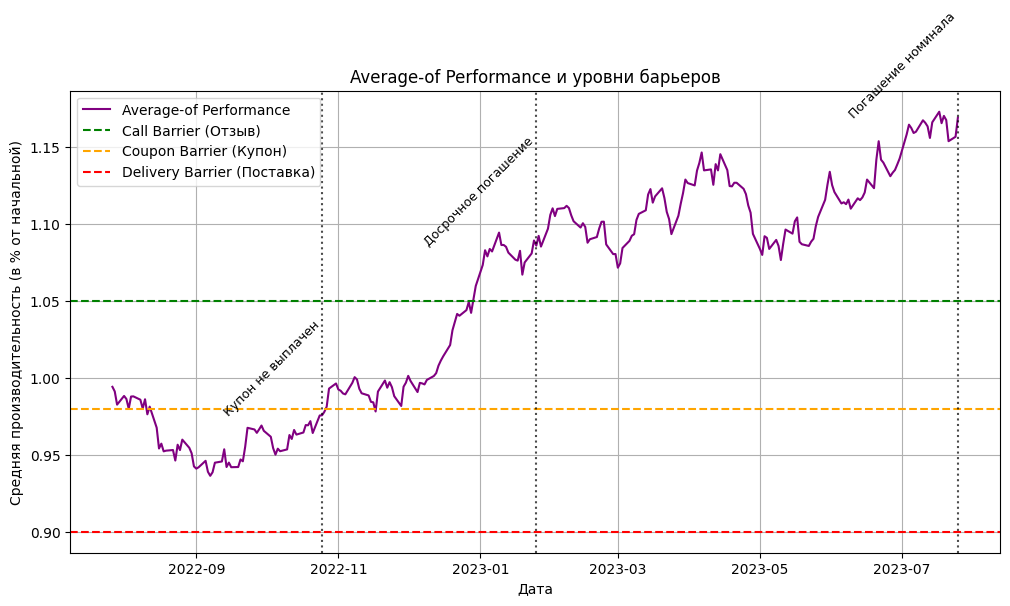

Общая выплата (average-of): 5000000
Общая выплата (worst-of): 4486058.760501499
Общая выплата (average-of): 5000000


In [25]:
# Расчет average-of performance
average_of = price_data_normalized.mean(axis=1)

# Определение выплат и действий для average-of
results_avg = []
for obs_date in observation_dates:
    avg_value = average_of.loc[obs_date]
    if avg_value >= call_barrier:
        results_avg.append((obs_date, "Досрочное погашение", avg_value))
        break
    elif avg_value >= coupon_barrier:
        results_avg.append((obs_date, "Выплата купона", avg_value))
    else:
        results_avg.append((obs_date, "Купон не выплачен", avg_value))
final_avg_value = average_of.loc[end_date]
results_avg.append((end_date, "Эффект поставки" if final_avg_value < delivery_barrier else "Погашение номинала", final_avg_value))

# Преобразование дат в datetime для consistency
results_avg = [(pd.Timestamp(date), action, value) for date, action, value in results_avg]

# График average-of performance
plt.figure(figsize=(12, 6))
plt.plot(price_data_normalized.index, average_of, label="Average-of Performance", color="purple")

# Добавляем барьеры
plt.axhline(call_barrier, color="green", linestyle="--", label="Call Barrier (Отзыв)")
plt.axhline(coupon_barrier, color="orange", linestyle="--", label="Coupon Barrier (Купон)")
plt.axhline(delivery_barrier, color="red", linestyle="--", label="Delivery Barrier (Поставка)")

# Отмечаем купонные даты и действия
for date, action, value in results_avg:
    plt.axvline(date, color="black", linestyle=":", alpha=0.7)
    plt.text(date, value, action, fontsize=9, rotation=45, ha="right")

# Настройки графика
plt.title("Average-of Performance и уровни барьеров")
plt.xlabel("Дата")
plt.ylabel("Средняя производительность (в % от начальной)")
plt.legend()
plt.grid()
plt.show()

# Финансовый результат для average-of
def calculate_payoff_avg(results, investment, coupon_rate):
    total_coupons = 0
    for date, action, value in results:
        if "купон" in action:
            total_coupons += coupon_rate * investment
        if "Досрочное погашение" in action:
            return investment + total_coupons
        elif "Эффект поставки" in action:
            return value * investment
    return investment + total_coupons  # Погашение номинала

total_payoff_avg = calculate_payoff_avg(results_avg, investment, coupon_rate)
print(f"Общая выплата (average-of): {total_payoff_avg}")

# Сравнение выплат
print(f"Общая выплата (worst-of): {calculate_payoff_avg(results, investment, coupon_rate)}")
print(f"Общая выплата (average-of): {total_payoff_avg}")